In [685]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Sea|born style for graphics

listingData = pd.read_csv('listings.csv')
calendarData = pd.read_csv('calendar.csv')
reviewData = pd.read_csv('reviews.csv')

In [686]:
calendarData['available'] = calendarData['available'].map(lambda available: 1 if available == 't' else 0)
occupy = calendarData[['listing_id', 'available']].groupby('listing_id').mean()
occupy['occupancy'] =  1 - occupy['available']
occupy = occupy.reset_index()

In [687]:
reviewScore = listingData[['id', 'review_scores_rating']].groupby('id').mean()
reviewScore = reviewScore.reset_index()

In [688]:
popularity = pd.merge(occupy, reviewScore, left_on='listing_id', right_on='id')

In [689]:
testing_id_equal_to_listing_id = popularity['id'] == popularity['listing_id']
testing_id_equal_to_listing_id.value_counts()

True    3818
dtype: int64

In [690]:
del popularity['id']

In [691]:
a = ((popularity['occupancy'] >= 0.6))
b = (popularity['review_scores_rating'] >= 90.0)
popularity['popular'] = (a & b)

In [692]:
popularity

listing_id  available  occupancy  review_scores_rating  popular
0           3335   0.846575   0.153425                   NaN    False
1           4291   1.000000   0.000000                  92.0    False
2           5682   0.846575   0.153425                  96.0    False
3           6606   1.000000   0.000000                  93.0    False
4           7369   0.145205   0.854795                  94.0     True
5           9419   1.000000   0.000000                  91.0    False
6           9460   0.156164   0.843836                  98.0     True
7           9531   0.493151   0.506849                 100.0    False
8           9534   0.717808   0.282192                 100.0    False
9           9596   0.994521   0.005479                  88.0    False
10         10385   1.000000   0.000000                  94.0    False
11         10695   1.000000   0.000000                  95.0    False
12         11012   1.000000   0.000000                  95.0    False
13         11411   1.000000   0.000000                  93.0    False
14         13068   0.942466   0.057534                  93.0    False
15         14386   0.865753   0.134247                  96.0    False
16         15108   0.838356   0.161644                  86.0    False
17         17951   0.841096   0.158904                  94.0    False
18         19611   0.413699   0.586301                  87.0    False
19         19619   0.375342   0.624658                  98.0     True
20         19623   0.471233   0.528767                  89.0    False
21         20868   0.980822   0.019178                  94.0    False
22         20927   0.934247   0.065753                  97.0    False
23         20928   0.915068   0.084932                  97.0    False
24         23192   0.931507   0.068493                 100.0    False
25         23356   0.895890   0.104110                  83.0    False
26         23430   0.432877   0.567123                  96.0    False
27         23919   0.868493   0.131507                  97.0    False
28         24212   0.394521   0.605479                  91.0     True
29         25002   0.843836   0.156164                  98.0    False
...          ...        ...        ...                   ...      ...
3788    10234558   0.972603   0.027397                   NaN    False
3789    10235014   0.008219   0.991781                   NaN    False
3790    10235136   0.002740   0.997260                   NaN    False
3791    10247453   0.991781   0.008219                   NaN    False
3792    10248139   0.093151   0.906849                 100.0     True
3793    10249527   0.019178   0.980822                   NaN    False
3794    10250735   0.010959   0.989041                   NaN    False
3795    10252110   0.052055   0.947945                   NaN    False
3796    10262971   1.000000   0.000000                   NaN    False
3797    10265391   0.991781   0.008219                   NaN    False
3798    10267360   0.241096   0.758904                   NaN    False
3799    10272763   1.000000   0.000000                   NaN    False
3800    10273158   0.964384   0.035616                   NaN    False
3801    10274175   0.945205   0.054795                   NaN    False
3802    10279830   0.923288   0.076712                   NaN    False
3803    10281965   0.975342   0.024658                   NaN    False
3804    10292753   0.416438   0.583562                   NaN    False
3805    10295151   0.978082   0.021918                   NaN    False
3806    10299108   0.178082   0.821918                   NaN    False
3807    10299195   0.038356   0.961644                   NaN    False
3808    10309898   1.000000   0.000000                   NaN    False
3809    10310373   0.961644   0.038356                   NaN    False
3810    10318171   0.997260   0.002740                   NaN    False
3811    10319529   0.002740   0.997260                   NaN    False
3812    10331249   0.969863   0.030137                   NaN    False
3813    10332096

In [693]:
#LOOKING AT HOST RESPONSE TIME

In [694]:
listingData['host_response_code'] = pd.Categorical(listingData['host_response_time'])
listingData['host_response_code'] = listingData['host_response_code'].cat.codes
pd.Categorical(listingData['host_response_time'])
#codes: {-1:'NaN' 0: 'a few days or more', 1: within a day, 2: 'within a few hours' , 3: 'within an hour'}

[within a few hours, within an hour, within a few hours, NaN, within an hour, ..., within a few hours, within an hour, NaN, within an hour, within a day]
Length: 3818
Categories (4, object): [a few days or more, within a day, within a few hours, within an hour]

In [695]:
host_response_data = listingData[['id', 'host_response_code']].groupby('id').mean().reset_index()

In [696]:
host_response_data['popular'] = popularity['popular']

In [697]:
host_code_to_popular_ct = host_response_data[['host_response_code', 'popular']].groupby('host_response_code').sum().reset_index()

In [698]:
#We see fairly good correlation between higher response codes (meaning faster responses) to popularity rates ~ 0.81
host_code_to_popular_ct.corr()

host_response_code   popular
host_response_code            1.000000  0.811433
popular                       0.811433  1.000000

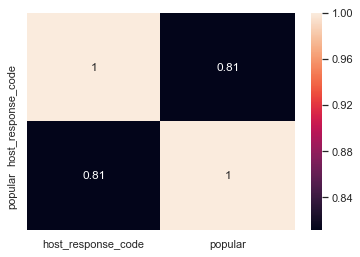

In [699]:
sb.heatmap(host_code_to_popular_ct.corr(), annot=True)

In [700]:
#LOOKING AT NEIGHBORHOOD 

In [701]:
listingData['neighborhood_code'] = pd.Categorical(listingData['neighbourhood_cleansed'])
listingData['neighborhood_code'] = listingData['neighborhood_code'].cat.codes
pd.Categorical(listingData['neighbourhood_cleansed'])

[West Queen Anne, West Queen Anne, West Queen Anne, West Queen Anne, West Queen Anne, ..., Fremont, Portage Bay, Rainier Beach, Madison Park, East Queen Anne]
Length: 3818
Categories (87, object): [Adams, Alki, Arbor Heights, Atlantic, ..., Westlake, Whittier Heights, Windermere, Yesler Terrace]

In [702]:
neighborhood_data = listingData[['id', 'neighborhood_code']].groupby('id').sum().reset_index()

In [703]:
neighborhood_data['popular'] = popularity['popular']

In [704]:
nbr_code_to_popular_ct = neighborhood_data[['neighborhood_code', 'popular']].groupby('neighborhood_code').sum().reset_index()
nbr_code_to_popular_ct = nbr_code_to_popular_ct.sort_values(by=['popular'], ascending=False)
nbr_code_to_popular_ct.head()

neighborhood_code  popular
9                   9    100.0
4                   4     42.0
47                 47     31.0
79                 79     29.0
21                 21     29.0

In [705]:
#We can now see the top 5 neighborhoods had the highest # of popular airbnbs
for elem in nbr_code_to_popular_ct['neighborhood_code'].head():
    print(listingData.loc[listingData['neighborhood_code'] == elem]['neighbourhood_cleansed'].iloc[0])

Broadway
Belltown
Minor
Wallingford
Fremont


In [706]:
#LOOKING AT INSTANT BOOKABILITY

In [707]:
listingData['instant_bookable'] = listingData['instant_bookable'].map(lambda book: 1 if book == 't' else 0)

In [708]:
bookability_data = listingData[['id', 'instant_bookable']].groupby('id').sum().reset_index()
bookability_data['popular'] = popularity['popular']

In [709]:
book_ct_per_code = bookability_data[['instant_bookable', 'popular']].groupby('instant_bookable').sum().reset_index()

In [710]:
#We see a direct (-1) negative correlation between instant bookability and popularity. This directly makes sense because
#those that are instantly bookable, likely have little to no demand, meaning high availibility and thus low popularity
#by our calculations. 
book_ct_per_code.corr()

instant_bookable  popular
instant_bookable               1.0     -1.0
popular                       -1.0      1.0

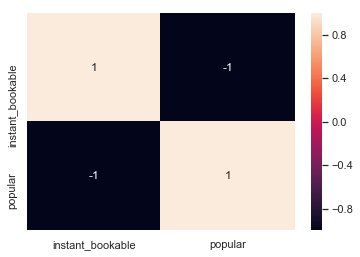

In [711]:
sb.heatmap(book_ct_per_code.corr(), annot=True)

In [712]:
#LOOKING AT PROPERTY TYPE

In [713]:
listingData['property_code'] = pd.Categorical(listingData['property_type'])
listingData['property_code'] = listingData['property_code'].cat.codes
pd.Categorical(listingData['property_type'])

[Apartment, Apartment, House, Apartment, House, ..., House, Apartment, House, Condominium, Apartment]
Length: 3818
Categories (16, object): [Apartment, Bed & Breakfast, Boat, Bungalow, ..., Tent, Townhouse, Treehouse, Yurt]

In [714]:
property_data = listingData[['id', 'property_code']].groupby('id').sum().reset_index()

In [715]:
property_data['popular'] = popularity['popular']

In [716]:
prop_code_to_popular_ct = property_data[['property_code', 'popular']].groupby('property_code').sum().reset_index()
prop_code_to_popular_ct = prop_code_to_popular_ct.sort_values(by=['popular'], ascending=False)

In [717]:
#We can now see the top 5 property types that had the highest # of popular airbnbs
for elem in prop_code_to_popular_ct['property_code'].head():
    print(listingData.loc[listingData['property_code'] == elem]['property_type'].iloc[0])

Apartment
House
Condominium
Townhouse
Bed & Breakfast


In [718]:
#LOOKING AT CANCELLATION POLICY

In [719]:
listingData['cancellation_code'] = pd.Categorical(listingData['cancellation_policy'])
listingData['cancellation_code'] = listingData['cancellation_code'].cat.codes
pd.Categorical(listingData['cancellation_policy'])
#codes: {0: flexible, 1: moderate, 2: strict}

[moderate, strict, strict, flexible, strict, ..., strict, moderate, moderate, moderate, flexible]
Length: 3818
Categories (3, object): [flexible, moderate, strict]

In [720]:
cancellation_data = listingData[['id', 'cancellation_code']].groupby('id').mean().reset_index()

In [721]:
cancellation_data['popular'] = popularity['popular']

In [722]:
can_code_to_popular_ct = cancellation_data[['cancellation_code', 'popular']].groupby('cancellation_code').sum().reset_index()

In [723]:
#We see surprisingly good correlation between higher cancellation codes (meaning moderate or strict policies) to popularity 
# ~ 0.74
can_code_to_popular_ct.corr()

cancellation_code   popular
cancellation_code           1.000000  0.737043
popular                     0.737043  1.000000

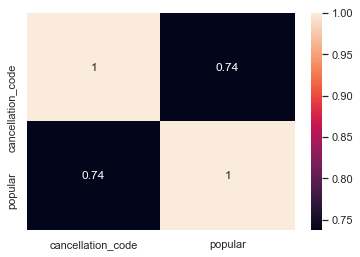

In [724]:
sb.heatmap(can_code_to_popular_ct.corr(), annot=True)